### Loading dataset and Exploratory Data Analysis

In [13]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

In [14]:
data = pd.read_csv(r"S:\SUNNY PC\Elevate Labs\Datasets\Housing.csv")

data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [15]:
print(data.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [16]:
print('Shape :', data.shape)
print()
print(data.info())

Shape : (545, 13)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [17]:
print(data.describe())

              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [18]:
cat_cols = data.select_dtypes(exclude=[np.number]).columns.tolist()
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric:", num_cols)
print("Categorical:", cat_cols)

Numeric: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


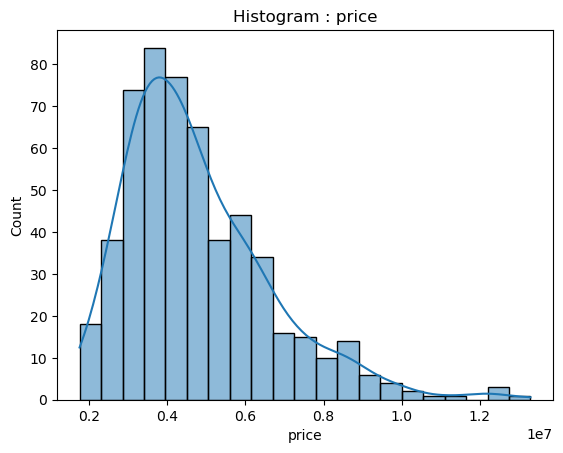

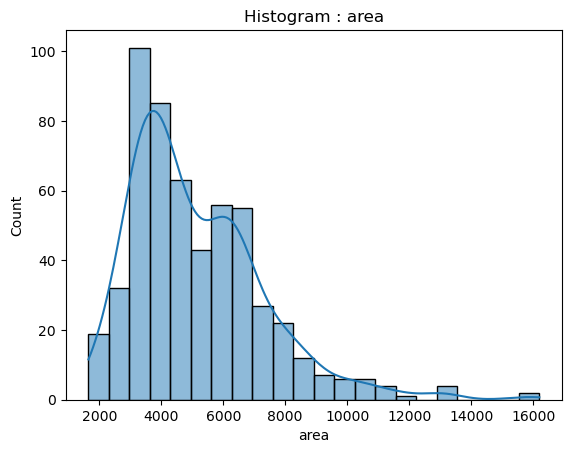

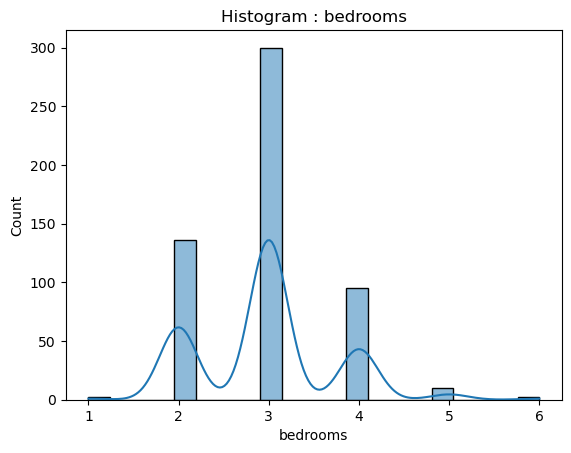

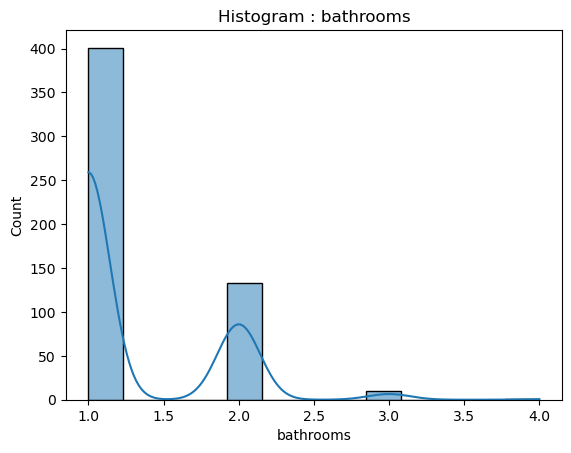

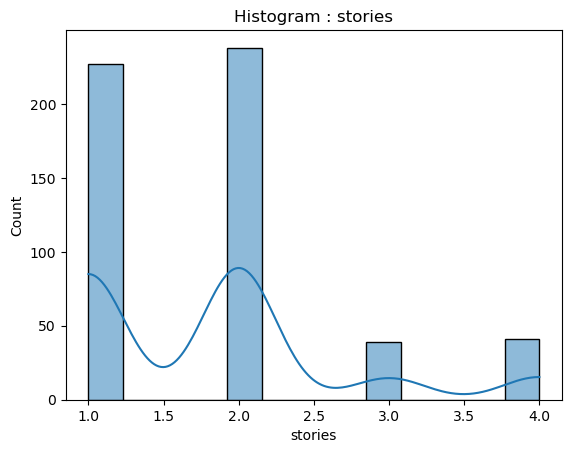

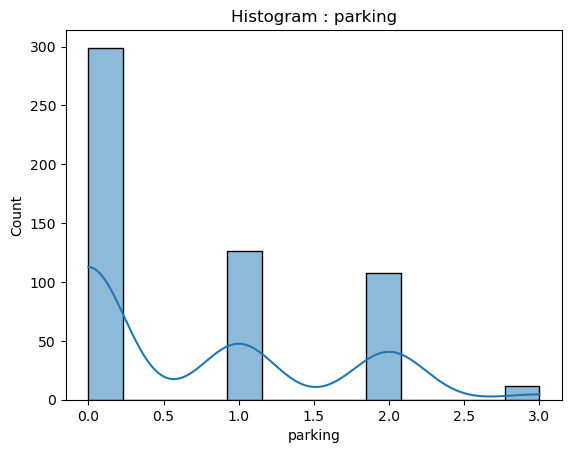

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in num_cols :
    sns.histplot(data[col], kde=True)
    plt.title(f'Histogram : {col}')
    plt.show()

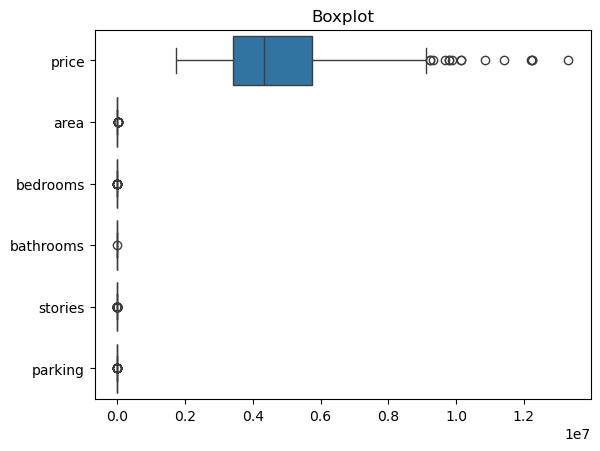

In [21]:
sns.boxplot(data[num_cols], orient='h')
plt.title("Boxplot")
plt.show()

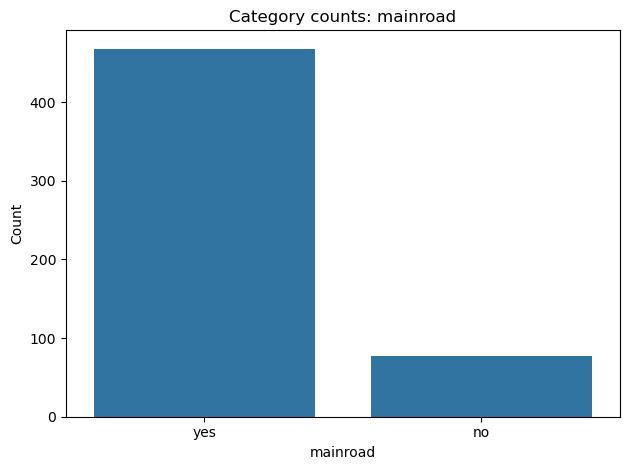

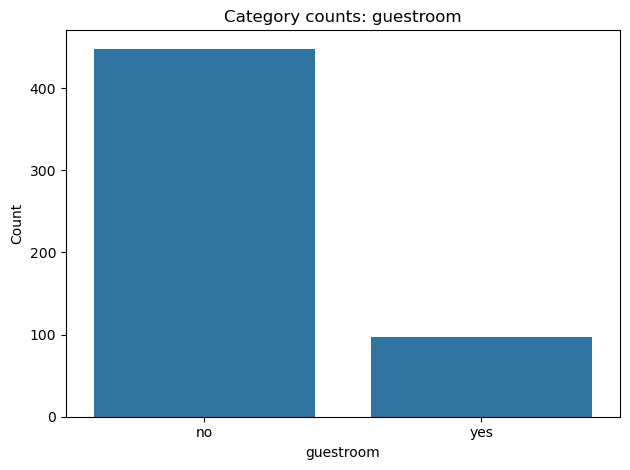

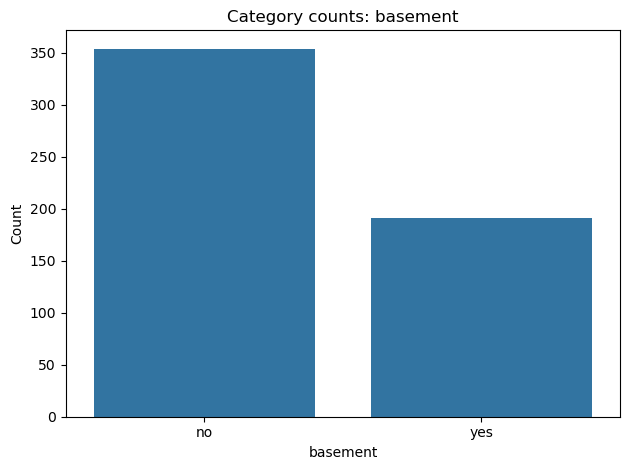

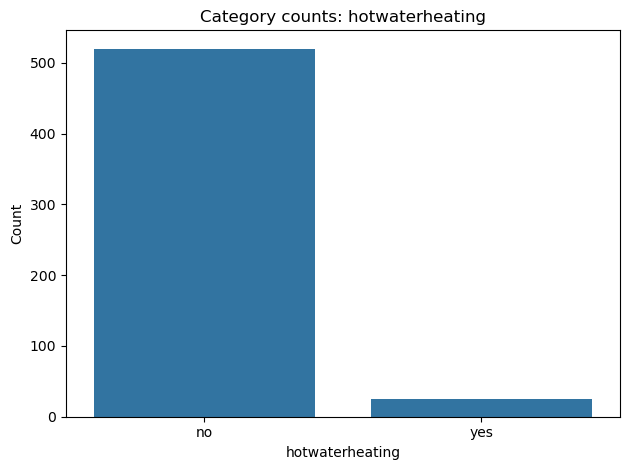

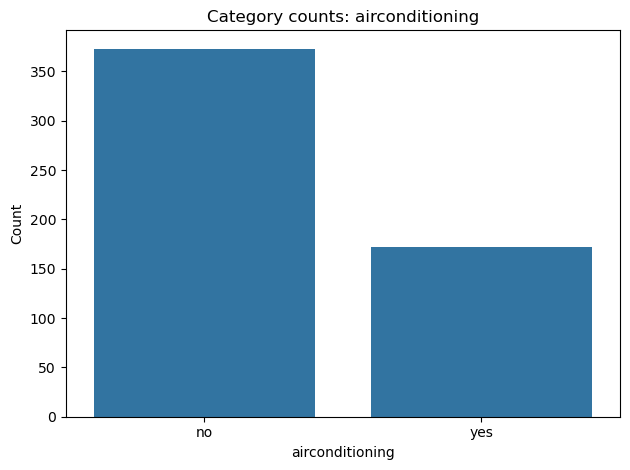

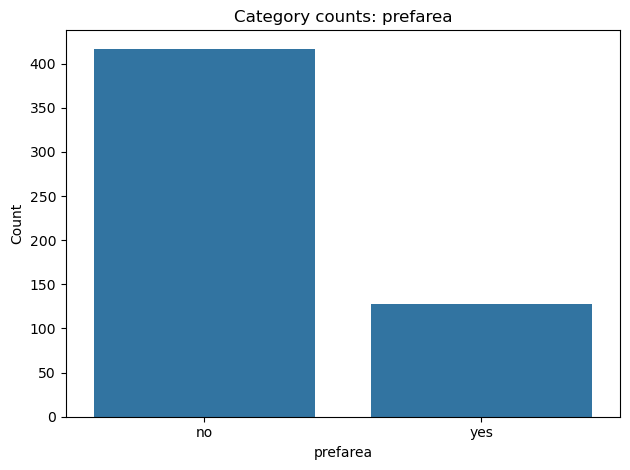

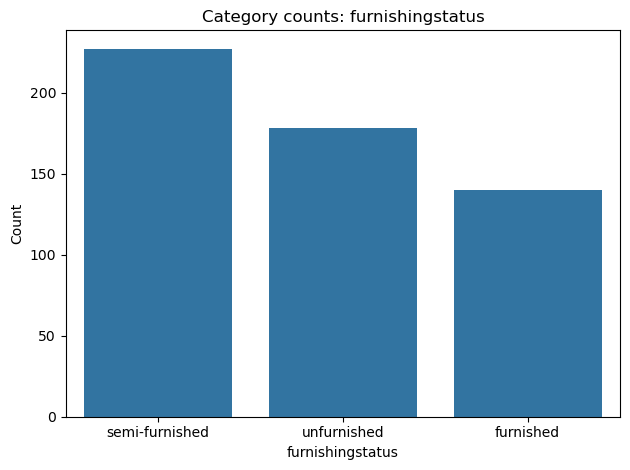

In [25]:
for col in cat_cols:  # limit if many
    vc = data[col].value_counts(dropna=False)
    sns.barplot(x=vc.index, y=vc.values, orient="v")
    plt.title(f"Category counts: {col}")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

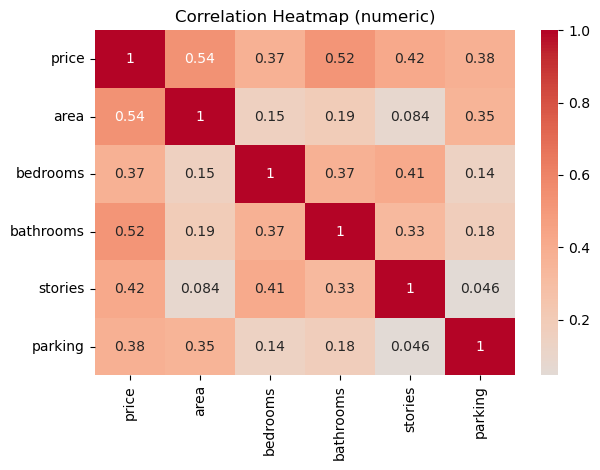

In [26]:
corr = data[num_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (numeric)")
plt.tight_layout()
plt.show()

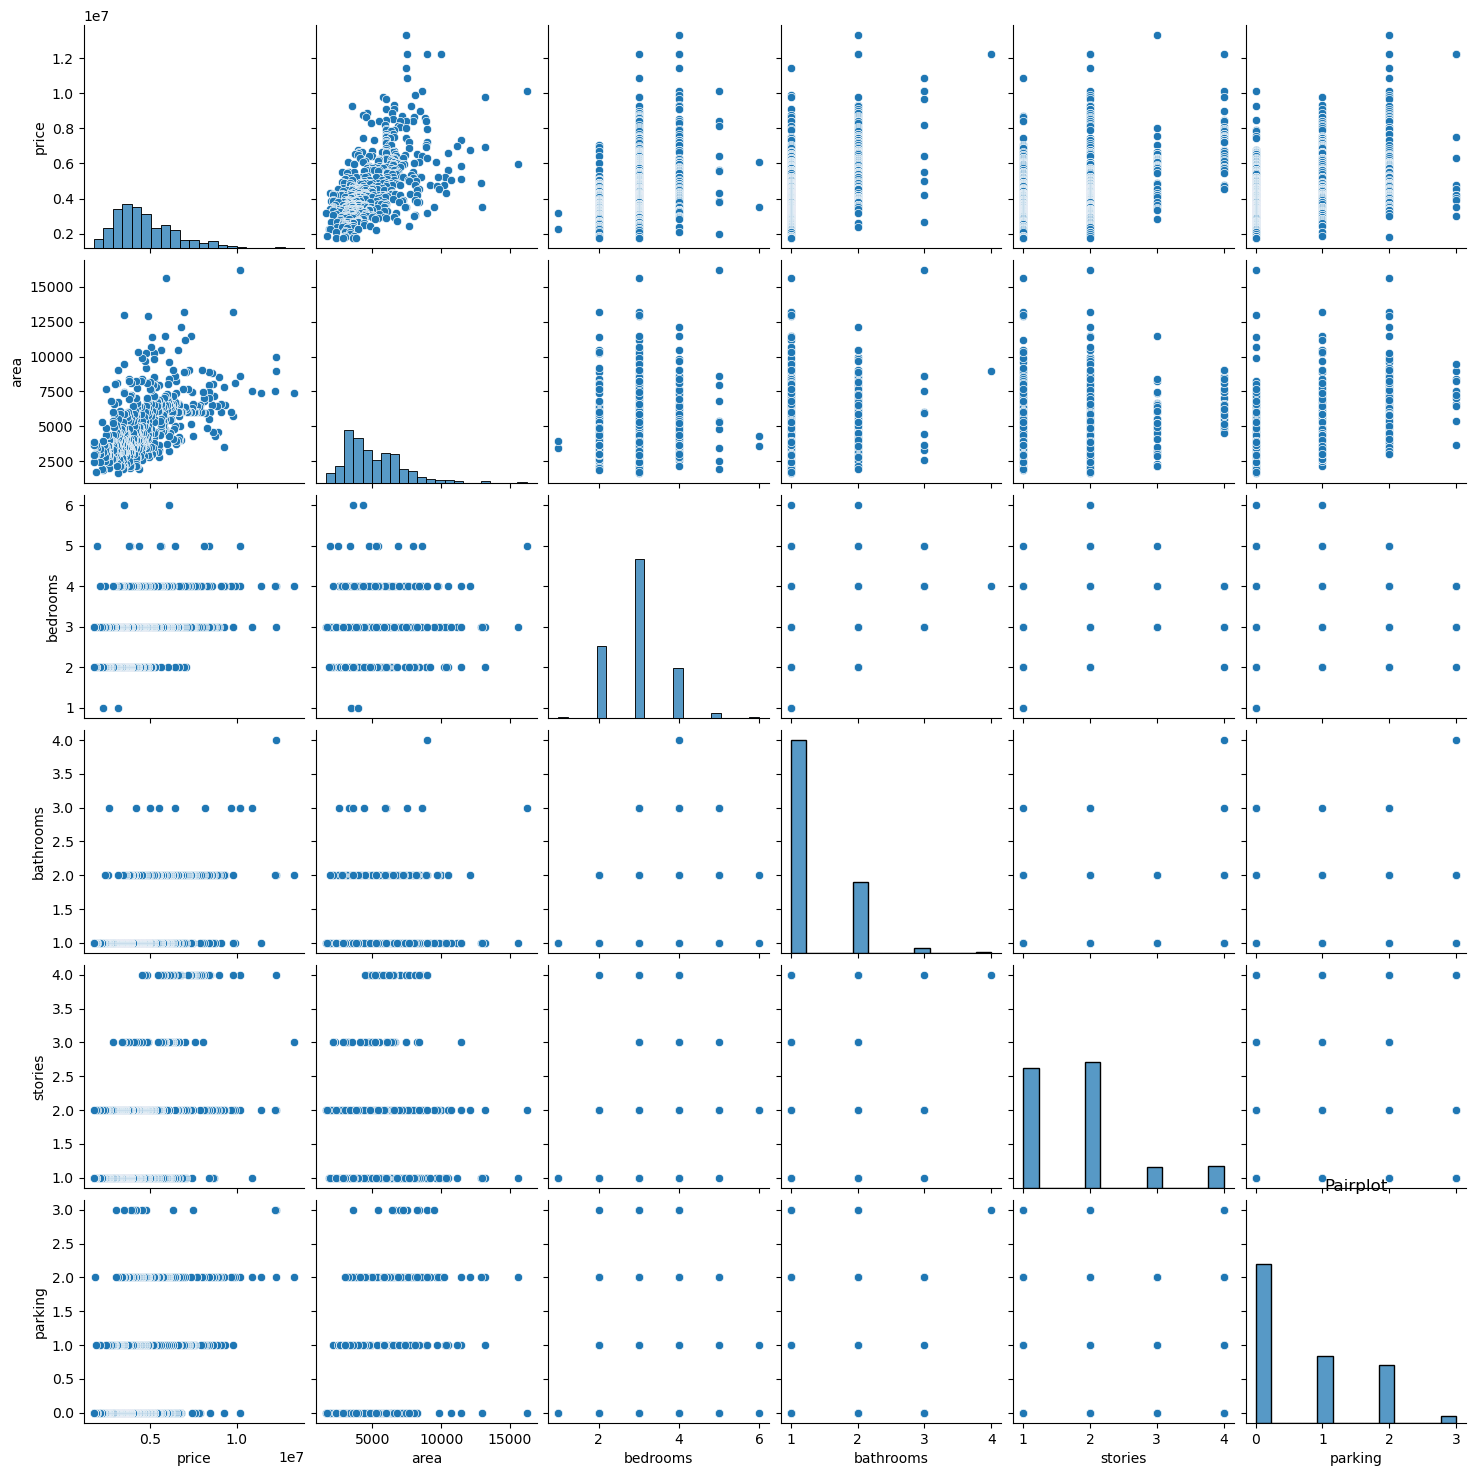

In [27]:
sns.pairplot(data[num_cols])
plt.title('Pairplot')
plt.show()

### Building a Linear Regression Model to predict housing price

In [28]:
data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [29]:
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']]

y = data['price']

In [37]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

In [38]:
print(X.head())

   area  bedrooms  bathrooms  stories  parking  mainroad_yes  guestroom_yes  \
0  7420         4          2        3        2          True          False   
1  8960         4          4        4        3          True          False   
2  9960         3          2        2        2          True          False   
3  7500         4          2        2        3          True          False   
4  7420         4          1        2        2          True           True   

   basement_yes  hotwaterheating_yes  airconditioning_yes  prefarea_yes  \
0         False                False                 True          True   
1         False                False                 True         False   
2          True                False                False          True   
3          True                False                 True          True   
4          True                False                 True         False   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0      

In [39]:
print(y.head())

0    13300000
1    12250000
2    12250000
3    12215000
4    11410000
Name: price, dtype: int64


In [40]:
print('X - Shape :', X.shape)
print('y - Shape :', y.shape)

X - Shape : (545, 13)
y - Shape : (545,)


In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
print(X_train.shape)

(436, 13)


In [43]:
print(X_test.shape)

(109, 13)


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_squared_error

y_pred_train = linreg.predict(X_train)
y_pred_test  = linreg.predict(X_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train  = r2_score(y_train, y_pred_train)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test  = r2_score(y_test, y_pred_test)

print("Train -> MAE:", mae_train, "MSE:", mse_train, "R2:", r2_train)
print("Test  -> MAE:", mae_test,  "MSE:", mse_test,  "R2:", r2_test)

Training Results :
Testing Results :
Train -> MAE: 719242.8936724712 MSE: 968358188440.7242 R2: 0.6859438988560158
Test  -> MAE: 970043.4039201644 MSE: 1754318687330.669 R2: 0.6529242642153175


In [52]:
coef_series = pd.Series(linreg.coef_, index=X.columns).sort_values(key=lambda s: s.abs(), ascending=False)
intercept = linreg.intercept_
print("\nIntercept:", intercept)
print("\nTop coefficients:\n", coef_series.head(15))


Intercept: 4706527.385321101

Top coefficients:
 bathrooms                          521879.027748
area                               519552.416340
airconditioning_yes                365157.393851
stories                            349251.438906
prefarea_yes                       266656.351993
furnishingstatus_unfurnished      -192015.917982
parking                            192005.953667
basement_yes                       187067.803214
hotwaterheating_yes                149862.702991
mainroad_yes                       128498.628215
guestroom_yes                       88768.667686
furnishingstatus_semi-furnished    -62837.321865
bedrooms                            57349.559419
dtype: float64


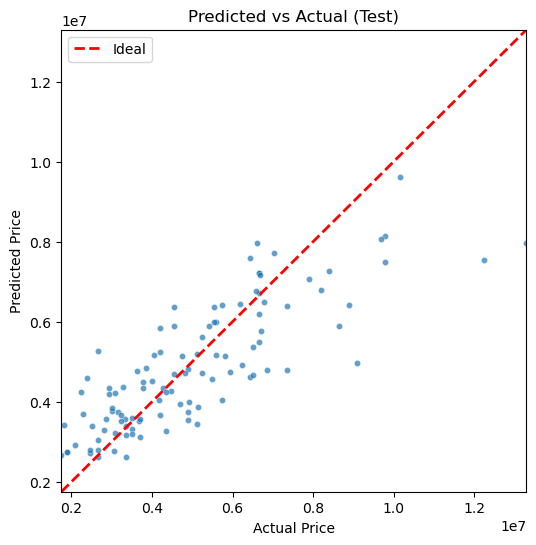

In [53]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred_test, s=20, alpha=0.7)
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, color="red", linestyle="--", linewidth=2, label="Ideal")
plt.xlim(lims); plt.ylim(lims)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual (Test)")
plt.legend()
plt.show()

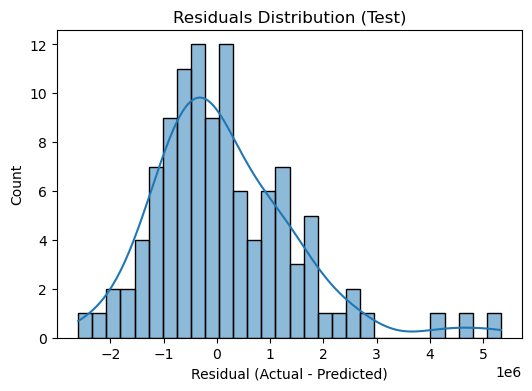

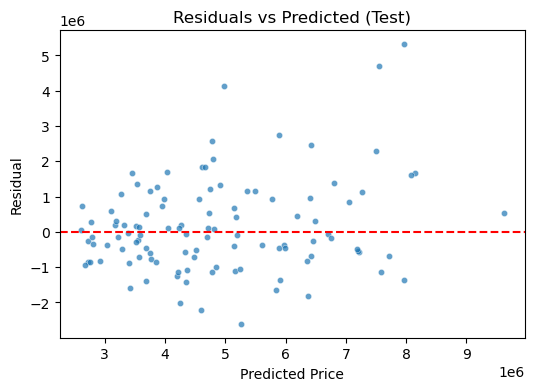

In [54]:
residuals = y_test - y_pred_test
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residuals Distribution (Test)")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred_test, y=residuals, s=20, alpha=0.7)
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted (Test)")
plt.xlabel("Predicted Price")
plt.ylabel("Residual")
plt.show()